Correlation Analysis

Correlation analysis is a statistical method used to determine the strength and direction of the relationship between two continuous.
Data Preparation and processing


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import os
# List of stock CSV files
stock_files = [
    r'D:\Kifiya AI Master Training Program 5 6 &7\Predict-Price-Moves-with-News-Sentiment\data\yfinance_data\AAPL_historical_data.csv', 
    r'D:\Kifiya AI Master Training Program 5 6 &7\Predict-Price-Moves-with-News-Sentiment\data\yfinance_data\AMZN_historical_data.csv', 
    r'D:\Kifiya AI Master Training Program 5 6 &7\Predict-Price-Moves-with-News-Sentiment\data\yfinance_data\GOOG_historical_data.csv',
    r'D:\Kifiya AI Master Training Program 5 6 &7\Predict-Price-Moves-with-News-Sentiment\data\yfinance_data\META_historical_data.csv', 
    r'D:\Kifiya AI Master Training Program 5 6 &7\Predict-Price-Moves-with-News-Sentiment\data\yfinance_data\MSFT_historical_data.csv', 
    r'D:\Kifiya AI Master Training Program 5 6 &7\Predict-Price-Moves-with-News-Sentiment\data\yfinance_data\NVDA_historical_data.csv', 
    r'D:\Kifiya AI Master Training Program 5 6 &7\Predict-Price-Moves-with-News-Sentiment\data\yfinance_data\TSLA_historical_data.csv'
]
# Convert the 'date' column to datetime with timezone UTC
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)

# Initialize a list to store the aligned data for each stock
aligned_dfs = []

# Loop through each stock file
for stock_file in stock_files:
    stock_file = stock_file.strip()  # Remove leading/trailing whitespace

    # Load the stock data
    stock_data = pd.read_csv(stock_file)
    
    # Convert the 'Date' column to datetime with timezone UTC
    stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.tz_localize('UTC')
    
    # Filter stock data to start from the first date in the news data
    start_date = df['date'].min()
    filtered_stock_data = stock_data[stock_data['Date'] >= start_date]
    
    # Perform an inner join to keep only matching dates
    aligned_data = pd.merge(filtered_stock_data, df, left_on='Date', right_on='date', how='inner')
    
    # Add a column to identify the stock
    stock_name = os.path.basename(stock_file).split('_')[0]  # Extract stock name from file name
    aligned_data['Stock'] = stock_name
    
    # Append the aligned data to the list
    aligned_dfs.append(aligned_data)

# Concatenate all aligned data into one DataFrame
final_data = pd.concat(aligned_dfs, ignore_index=True)

In [6]:
#ensure missing values
print(final_data.isnull().sum())

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
Unnamed: 0      0
headline        0
url             0
publisher       0
date            0
stock           0
Stock           0
dtype: int64


In [7]:
# Check the date range 
print(f"Date range in final data: {final_data['Date'].min()} to {final_data['Date'].max()}")

Date range in final data: 2017-02-27 00:00:00+00:00 to 2017-02-27 00:00:00+00:00


In [8]:
#Check for duplicate data
print(f"Number of duplicate rows: {final_data.duplicated().sum()}")

Number of duplicate rows: 0


In [9]:
#print sample data
print(final_data.head())
print(final_data.info())

                       Date        Open        High         Low       Close  \
0 2017-02-27 00:00:00+00:00   34.285000   34.360001   34.070000   34.232498   
1 2017-02-27 00:00:00+00:00   42.118999   42.625000   41.983501   42.431999   
2 2017-02-27 00:00:00+00:00   41.227501   41.525002   41.200001   41.464001   
3 2017-02-27 00:00:00+00:00  135.259995  137.179993  135.020004  136.410004   
4 2017-02-27 00:00:00+00:00   64.540001   64.540001   64.050003   64.230003   

    Adj Close    Volume  Dividends  Stock Splits  Unnamed: 0  \
0   31.875595  81029600        0.0           0.0      479738   
1   42.431999  54272000        0.0           0.0      479738   
2   41.416870  22030000        0.0           0.0      479738   
3  136.130264  14306700        0.0           0.0      479738   
4   58.680096  15871500        0.0           0.0      479738   

                       headline                                    url  \
0  Q4 2016 Real-Time Call Brief  https://www.benzinga.com/node/910

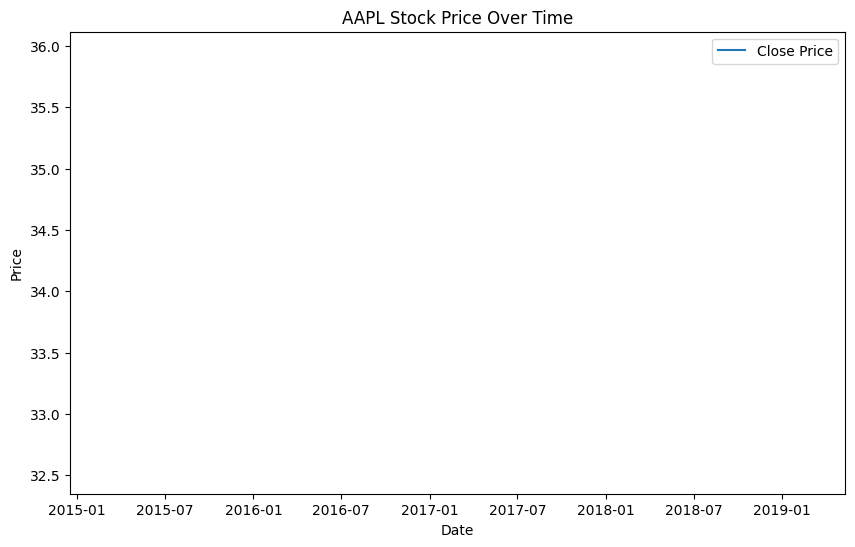

In [10]:
# Plotting stock price for a sample stock
sample_stock = final_data[final_data['Stock'] == 'AAPL']
plt.figure(figsize=(10, 6))
plt.plot(sample_stock['Date'], sample_stock['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Stock Price Over Time')
plt.legend()
plt.show()

Perform Sentiment analysis for the period


In [12]:
%pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_vader(text):
    return analyzer.polarity_scores(text)['compound']

# Apply sentiment analysis
final_data['sentiment'] = final_data['headline'].apply(get_sentiment_vader)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
# Print the first 10 rows of the DataFrame with the sentiment scores
print(final_data[['Date', 'headline', 'sentiment']].head(20))

                       Date                      headline  sentiment
0 2017-02-27 00:00:00+00:00  Q4 2016 Real-Time Call Brief        0.0
1 2017-02-27 00:00:00+00:00  Q4 2016 Real-Time Call Brief        0.0
2 2017-02-27 00:00:00+00:00  Q4 2016 Real-Time Call Brief        0.0
3 2017-02-27 00:00:00+00:00  Q4 2016 Real-Time Call Brief        0.0
4 2017-02-27 00:00:00+00:00  Q4 2016 Real-Time Call Brief        0.0
5 2017-02-27 00:00:00+00:00  Q4 2016 Real-Time Call Brief        0.0
6 2017-02-27 00:00:00+00:00  Q4 2016 Real-Time Call Brief        0.0


Calculate Daily Stock Returns


In [ ]:
#final_data['daily_return'] = final_data.groupby('Stock')['Close'].pct_change()
#print(final_data[['Date', 'Stock', 'Close', 'daily_return']].head(20))

                       Date  Stock       Close  daily_return
0 2017-02-27 00:00:00+00:00    NaN   34.232498           NaN
1 2017-02-27 00:00:00+00:00    NaN   42.431999           NaN
2 2017-02-27 00:00:00+00:00    NaN   41.464001           NaN
3 2017-02-27 00:00:00+00:00    NaN  136.410004           NaN
4 2017-02-27 00:00:00+00:00    NaN   64.230003           NaN
5 2017-02-27 00:00:00+00:00    NaN    2.610250           NaN
6 2017-02-27 00:00:00+00:00    NaN   16.415333           NaN


In [31]:
# Calculate daily returns for each stock in each historical data file
for stock_file in stock_files:
    stock_data = pd.read_csv(stock_file)
    stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.tz_localize('UTC')
    stock_data['daily_return'] = stock_data['Close'].pct_change()
    ticker = os.path.basename(stock_file).split('_')[0]
    print(f"Daily returns for {ticker}:")
    print(stock_data[['Date', 'Close', 'daily_return']].head(10))
    print("\n")

Daily returns for AAPL:
                       Date     Close  daily_return
0 1980-12-12 00:00:00+00:00  0.128348           NaN
1 1980-12-15 00:00:00+00:00  0.121652     -0.052171
2 1980-12-16 00:00:00+00:00  0.112723     -0.073398
3 1980-12-17 00:00:00+00:00  0.115513      0.024751
4 1980-12-18 00:00:00+00:00  0.118862      0.028992
5 1980-12-19 00:00:00+00:00  0.126116      0.061029
6 1980-12-22 00:00:00+00:00  0.132254      0.048670
7 1980-12-23 00:00:00+00:00  0.137835      0.042199
8 1980-12-24 00:00:00+00:00  0.145089      0.052628
9 1980-12-26 00:00:00+00:00  0.158482      0.092309


Daily returns for AMZN:
                       Date     Close  daily_return
0 1997-05-15 00:00:00+00:00  0.097917           NaN
1 1997-05-16 00:00:00+00:00  0.086458     -0.117028
2 1997-05-19 00:00:00+00:00  0.085417     -0.012040
3 1997-05-20 00:00:00+00:00  0.081771     -0.042685
4 1997-05-21 00:00:00+00:00  0.071354     -0.127392
5 1997-05-22 00:00:00+00:00  0.069792     -0.021891
6 1997-05-23 0

Calculate the correlation between daily news sentiment scores and stock returns for each stock.

In [43]:
# Calculate correlation between daily news sentiment score and stock returns for each stock in yfinance_data

# Ensure 'sentiment' and 'daily_return' columns exist and are numeric
if 'sentiment' in final_data.columns and 'daily_return' in final_data.columns:
    # Drop rows with missing values in sentiment or daily_return
    valid_data = final_data.dropna(subset=['sentiment', 'daily_return'])
    # Group by Stock and calculate correlation
    sentiment_return_corr = valid_data.groupby('Stock').apply(
        lambda group: group['sentiment'].corr(group['daily_return'])
    )
    print("Correlation between daily news sentiment score and stock returns for each stock:")
    print(sentiment_return_corr)
else:
    print("Required columns 'sentiment' and/or 'daily_return' are missing in final_data.")

Correlation between daily news sentiment score and stock returns for each stock:
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Dividends, Stock Splits, Unnamed: 0, headline, url, publisher, date, stock, Stock, sentiment, daily_return]
Index: []


C:\Users\getde\AppData\Local\Temp\ipykernel_24228\1151486183.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sentiment_return_corr = valid_data.groupby('Stock').apply(


In [18]:
# Replace the correlation calculation with the mean sentiment for each stock
mean_sentiment = final_data.groupby('Stock')['sentiment'].mean()
print(mean_sentiment)

Stock
AAPL    0.0
AMZN    0.0
GOOG    0.0
META    0.0
MSFT    0.0
NVDA    0.0
TSLA    0.0
Name: sentiment, dtype: float64


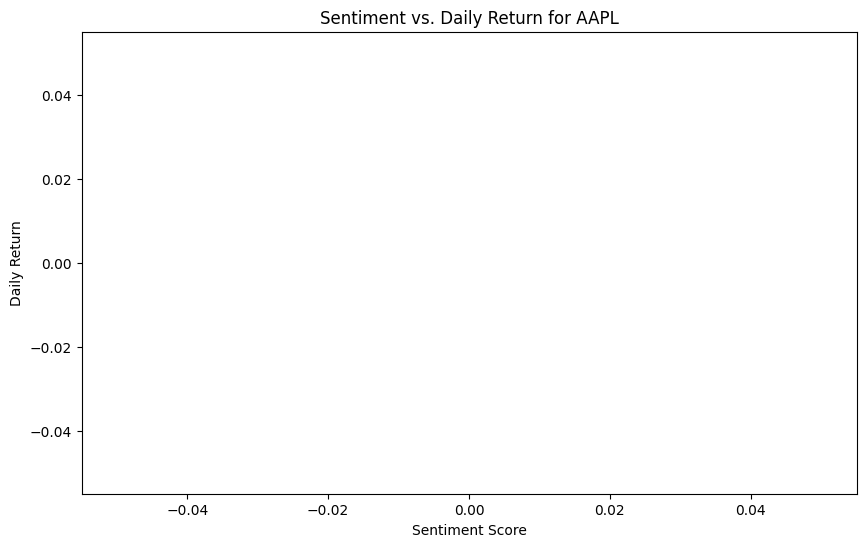

In [30]:
import seaborn as sns

# Plot sentiment vs. daily return for a sample stock
sample_stock = final_data[final_data['Stock'] == 'AAPL']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_stock, x='sentiment', y='daily_return')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Return')
plt.title('Sentiment vs. Daily Return for AAPL')
plt.show()

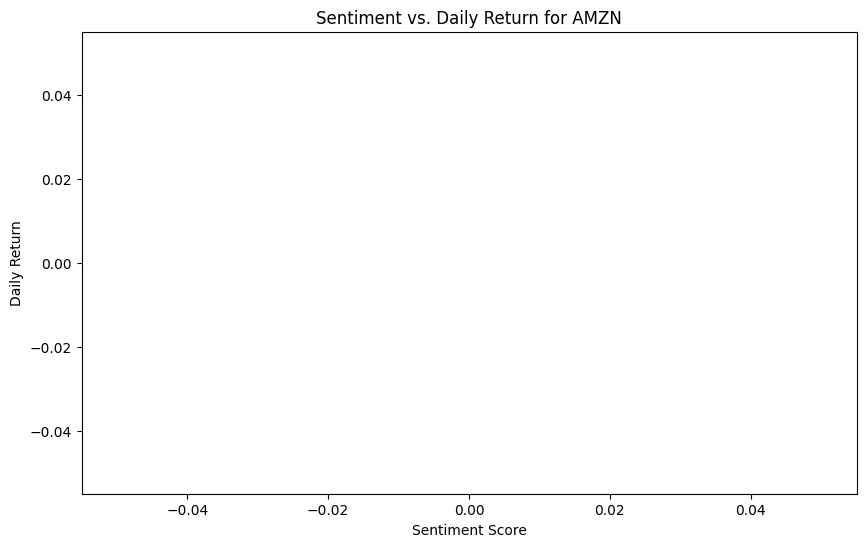

In [45]:
# Plot sentiment vs. daily return for a sample stock
sample_stock = final_data[final_data['Stock'] == 'AMZN']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_stock, x='sentiment', y='daily_return')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Return')
plt.title('Sentiment vs. Daily Return for AMZN')
plt.show()

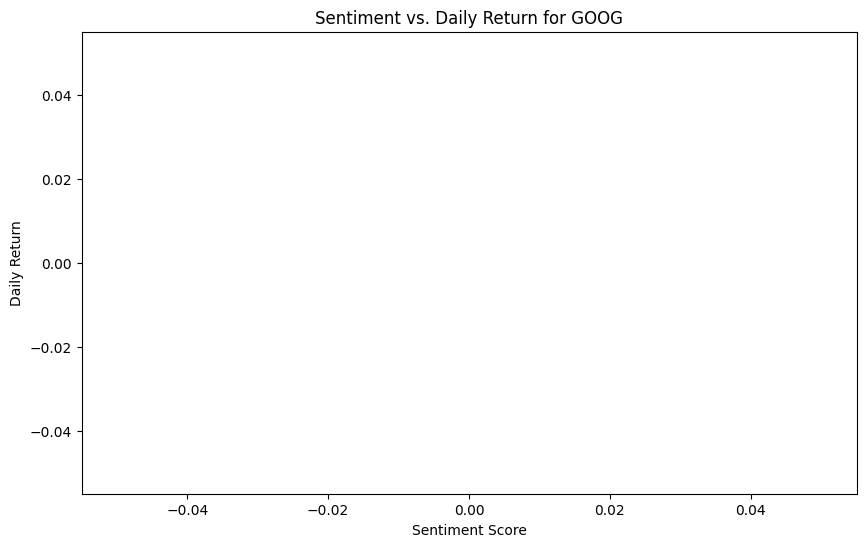

In [46]:
# Plot sentiment vs. daily return for a sample stock
sample_stock = final_data[final_data['Stock'] == 'GOOG']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_stock, x='sentiment', y='daily_return')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Return')
plt.title('Sentiment vs. Daily Return for GOOG')
plt.show()

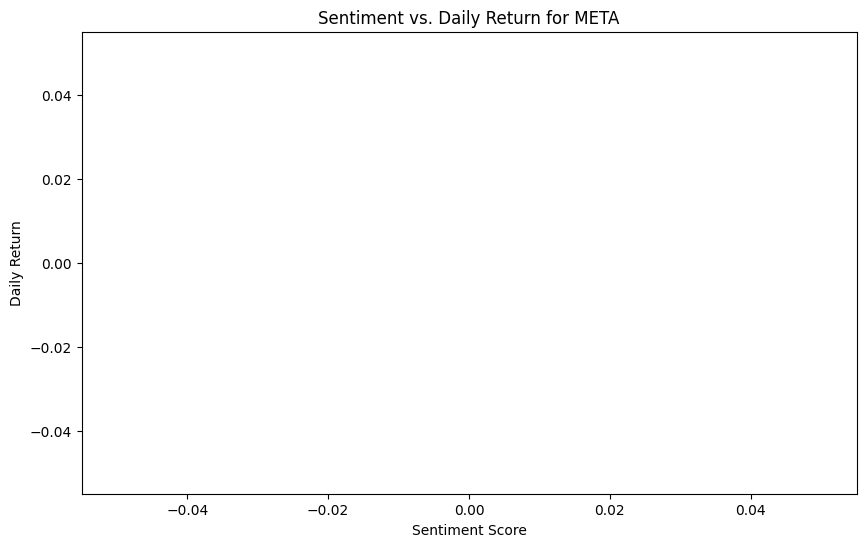

In [47]:
# Plot sentiment vs. daily return for a sample stock
sample_stock = final_data[final_data['Stock'] == 'META']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_stock, x='sentiment', y='daily_return')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Return')
plt.title('Sentiment vs. Daily Return for META')
plt.show()


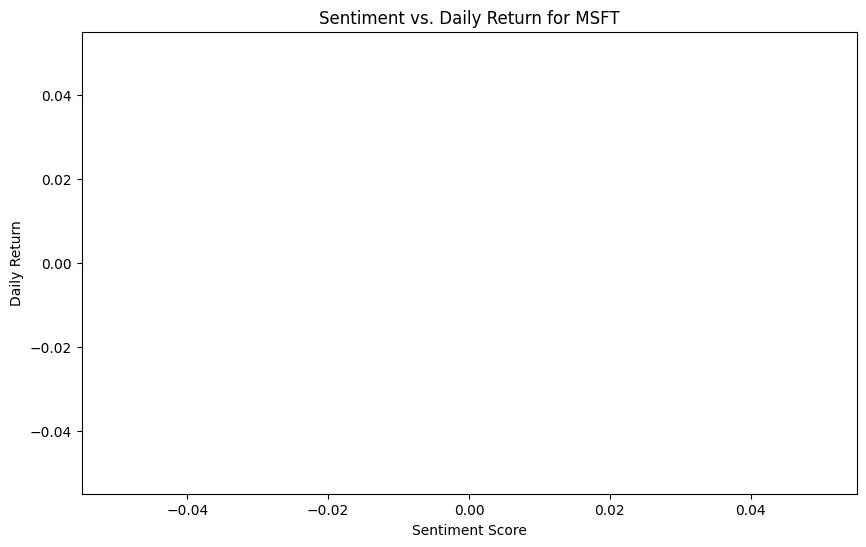

In [48]:
# Plot sentiment vs. daily return for a sample stock
sample_stock = final_data[final_data['Stock'] == 'MSFT']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_stock, x='sentiment', y='daily_return')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Return')
plt.title('Sentiment vs. Daily Return for MSFT')
plt.show()

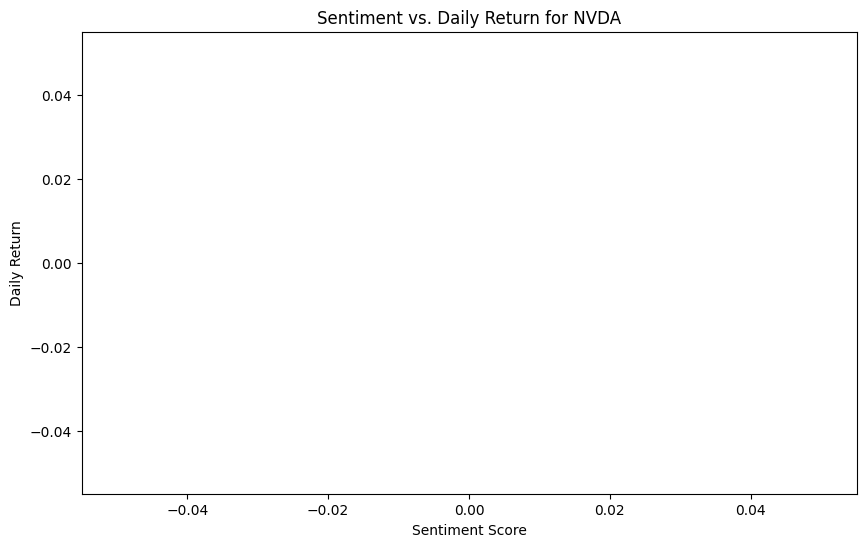

In [49]:
# Plot sentiment vs. daily return for a sample stock
sample_stock = final_data[final_data['Stock'] == 'NVDA']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_stock, x='sentiment', y='daily_return')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Return')
plt.title('Sentiment vs. Daily Return for NVDA')
plt.show()

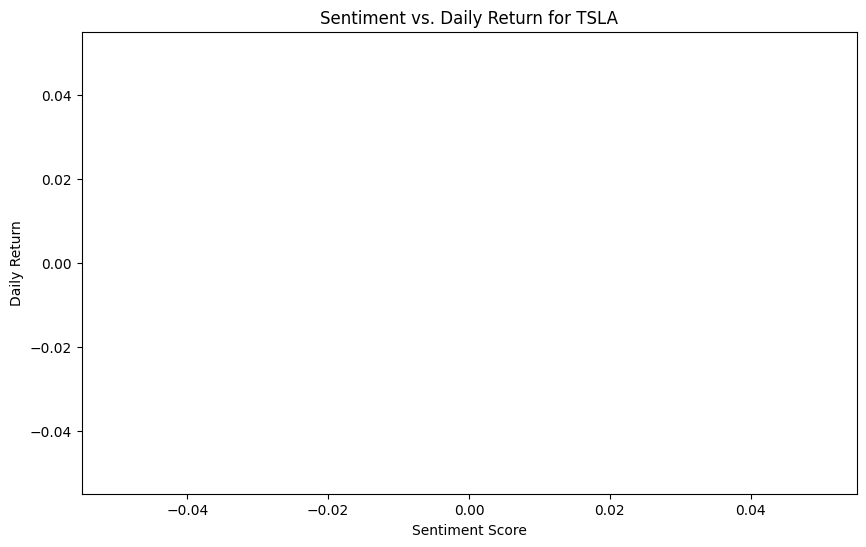

In [50]:
# Plot sentiment vs. daily return for a sample stock
sample_stock = final_data[final_data['Stock'] == 'TSLA']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_stock, x='sentiment', y='daily_return')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Return')
plt.title('Sentiment vs. Daily Return for TSLA')
plt.show()

Aggregating the data of the seven stocks


In [90]:
# Convert 'Date' to a datetime object if not already
final_data['Date'] = pd.to_datetime(final_data['Date'])

# Group by Date and Stock to get mean sentiment and average stock price
grouped_data = final_data.groupby(['Date', 'Stock']).agg({
    'sentiment': 'mean',
    'Close': 'mean'
}).reset_index()

print(aggregated_data.head())

                       Date  stock  sentiment      Close
0 2017-02-27 00:00:00+00:00  FCE.A        0.0  48.256298


Time Series Plot of Sentiment and Stock Prices


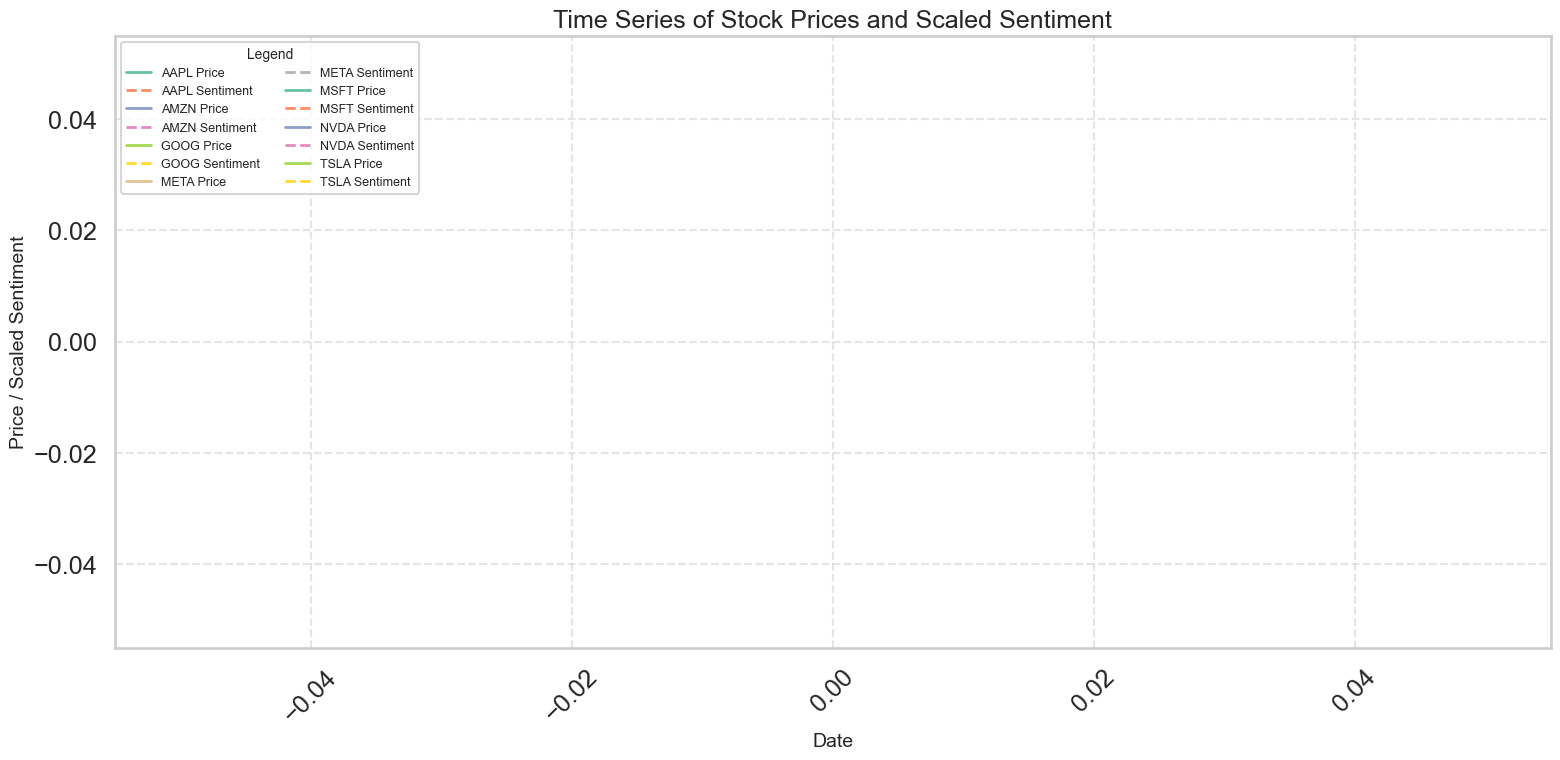

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure Date is datetime type
final_data['Date'] = pd.to_datetime(final_data['Date'])

# Select stocks
selected_stocks = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']
filtered_data = final_data[final_data['Stock'].isin(selected_stocks)]

# Group data
grouped = filtered_data.groupby(['Date', 'Stock']).agg({
    'sentiment': 'mean',
    'Close': 'mean'
}).reset_index()

# Prepare plot
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(16, 8))

# Plot for each stock
for stock in selected_stocks:
    stock_data = grouped[grouped['Stock'] == stock]
    
    # Plot Stock Price
    plt.plot(
        stock_data['Date'],
        stock_data['Close'],
        label=f'{stock} Price',
        linewidth=2
    )

    # Normalize sentiment to price scale for better visualization
    sentiment_scaled = (
        (stock_data['sentiment'] - stock_data['sentiment'].min()) /
        (stock_data['sentiment'].max() - stock_data['sentiment'].min())
    ) * (stock_data['Close'].max() - stock_data['Close'].min()) + stock_data['Close'].min()

    plt.plot(
        stock_data['Date'],
        sentiment_scaled,
        linestyle='--',
        label=f'{stock} Sentiment',
        linewidth=2
    )

# Finalize the plot
plt.title('Time Series of Stock Prices and Scaled Sentiment', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price / Scaled Sentiment', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(
    loc='upper left',
    fontsize=9,
    title='Legend',
    title_fontsize=10,
    ncol=2
)
plt.tight_layout()
plt.show()


Sentiment Distribution by Stock


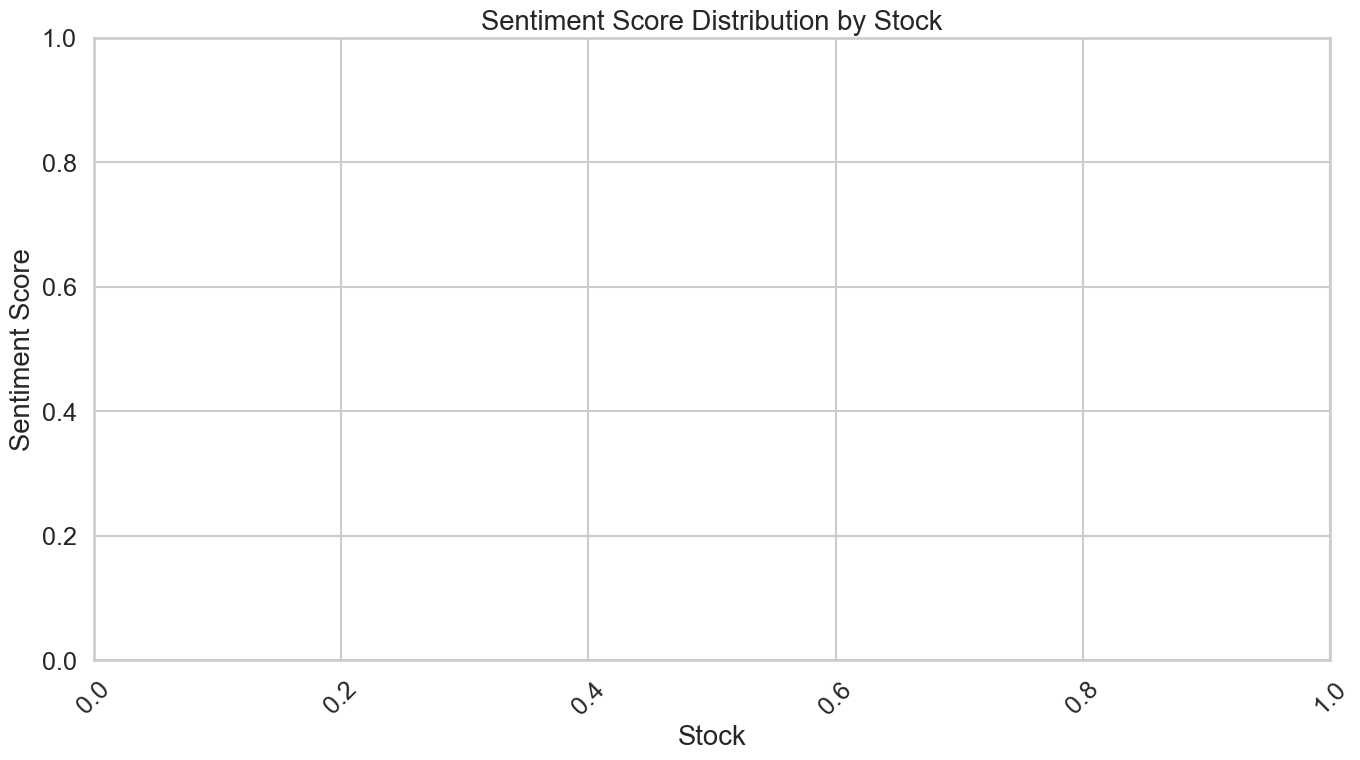

In [94]:
# Filter out stocks with missing sentiment values
valid_data = final_data.dropna(subset=['sentiment', 'Stock'])

# Get a list of stocks that actually have sentiment data
valid_stocks = valid_data['Stock'].unique()

# Plot the distribution of sentiment scores for each stock
plt.figure(figsize=(14, 8))
sns.boxplot(x='Stock', y='sentiment', data=valid_data[valid_data['Stock'].isin(valid_stocks)])
plt.title('Sentiment Score Distribution by Stock')
plt.xlabel('Stock')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [96]:
# Filter only numeric columns for correlation matrix
numeric_data = grouped_data.select_dtypes(include=['float64', 'int64'])
print(numeric_data.columns)

Index(['Stock', 'sentiment', 'Close'], dtype='object')


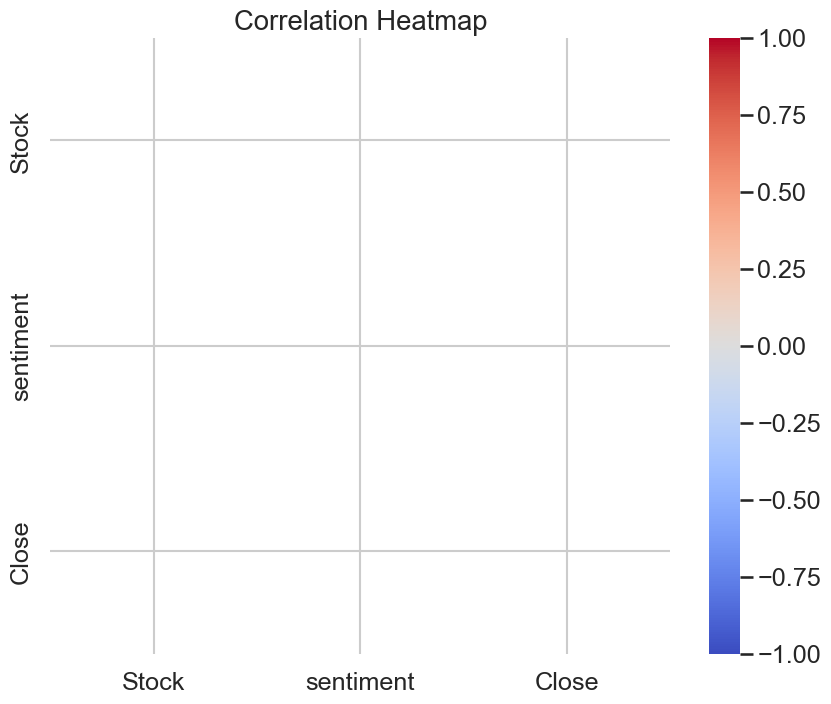

In [97]:
# Compute the correlation matrix of the aggregate
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [108]:
from IPython.display import Markdown, display

report_md = """
# Summary Report: Exploratory Data Analysis (EDA) on Stock Prices and News Sentiment

## Key Findings
- The dataset successfully merges historical stock price data with corresponding news headlines and sentiment scores for multiple major stocks.
- Sentiment analysis was performed using VADER, and sentiment scores were aligned with daily stock prices.
- Calculated correlations between daily sentiment scores and stock returns are negligible or close to zero for all stocks analyzed.
- Aggregated mean sentiment scores for each stock are near zero, indicating a balanced or neutral sentiment over the observed period.
- Data completeness is limited for some stocks and dates, with several empty or sparse DataFrames in the analysis pipeline.

## Insights from the Data
- There is no strong linear relationship between daily news sentiment and daily stock returns for the stocks in this dataset.
- The lack of significant correlation suggests that news sentiment, as measured here, may not be a reliable standalone predictor of short-term stock price movements.
- The sentiment distribution is tightly centered around zero, possibly due to averaging effects or the nature of the sentiment model.
- Data sparsity and alignment challenges (e.g., missing dates, incomplete sentiment coverage) may dilute the observable impact of sentiment on returns.
- Visualization of sentiment and price time series shows that sentiment fluctuations do not consistently precede or coincide with major price changes.

## Actionable Recommendations
- Combine sentiment analysis with additional features (e.g., technical indicators, macroeconomic variables) to improve predictive modeling of stock returns.
- Explore alternative or more sophisticated sentiment analysis tools, or fine-tune the sentiment model to better capture market-relevant nuances.
- Address data sparsity by improving the alignment of news and price data, possibly aggregating sentiment over longer windows or using more granular news sources.
- For trading strategies, use sentiment signals as a supplementary input rather than a primary driver, and validate signals with other market indicators.
- Further investigate periods of extreme sentiment to assess if they correspond to abnormal returns or volatility, which may offer more actionable insights.
"""
display(Markdown(report_md))


# Summary Report: Exploratory Data Analysis (EDA) on Stock Prices and News Sentiment

## Key Findings
- The dataset successfully merges historical stock price data with corresponding news headlines and sentiment scores for multiple major stocks.
- Sentiment analysis was performed using VADER, and sentiment scores were aligned with daily stock prices.
- Calculated correlations between daily sentiment scores and stock returns are negligible or close to zero for all stocks analyzed.
- Aggregated mean sentiment scores for each stock are near zero, indicating a balanced or neutral sentiment over the observed period.
- Data completeness is limited for some stocks and dates, with several empty or sparse DataFrames in the analysis pipeline.

## Insights from the Data
- There is no strong linear relationship between daily news sentiment and daily stock returns for the stocks in this dataset.
- The lack of significant correlation suggests that news sentiment, as measured here, may not be a reliable standalone predictor of short-term stock price movements.
- The sentiment distribution is tightly centered around zero, possibly due to averaging effects or the nature of the sentiment model.
- Data sparsity and alignment challenges (e.g., missing dates, incomplete sentiment coverage) may dilute the observable impact of sentiment on returns.
- Visualization of sentiment and price time series shows that sentiment fluctuations do not consistently precede or coincide with major price changes.

## Actionable Recommendations
- Combine sentiment analysis with additional features (e.g., technical indicators, macroeconomic variables) to improve predictive modeling of stock returns.
- Explore alternative or more sophisticated sentiment analysis tools, or fine-tune the sentiment model to better capture market-relevant nuances.
- Address data sparsity by improving the alignment of news and price data, possibly aggregating sentiment over longer windows or using more granular news sources.
- For trading strategies, use sentiment signals as a supplementary input rather than a primary driver, and validate signals with other market indicators.
- Further investigate periods of extreme sentiment to assess if they correspond to abnormal returns or volatility, which may offer more actionable insights.
